# **Automatidata Project** 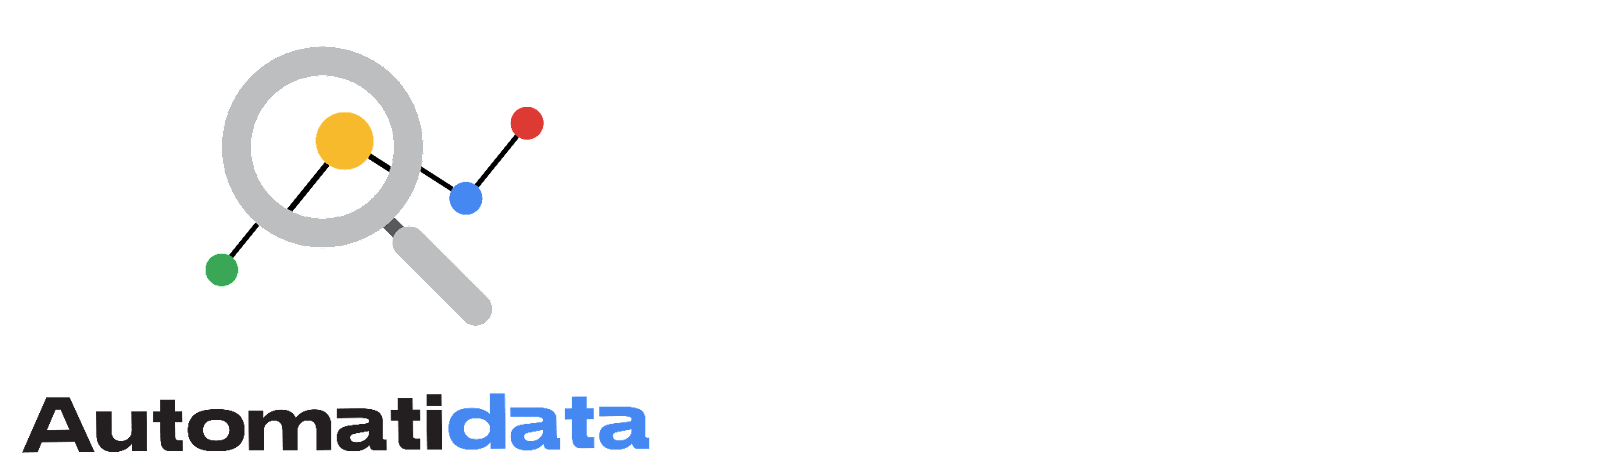
Project goal: 

In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.

### **Inspect and analyze data using EDA**

In [295]:
import pandas as pd
import numpy as np

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [296]:
df.head(10)

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip ID                22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

No null values. Two datetime columns, and one boolean Dtypes are unidetified and as object dtype for now.

In [298]:
df.describe()

,Trip ID,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Regarding fare_amount, and total_amount, the distribution is worth considering. The maximum fare_amount is a much larger value ($1000) than the 25-75 percent range of values. Also, it is questionable how there are negative values for fare_amount and total_amount. Regarding trip_distance, most rides are between 1-3 miles, but the maximum is over 33 miles. 

In [299]:
# sort the data by trip distance from maximum to minimum values

df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(10)

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [300]:
# Sort the data by total amount and print the top 20 values

total_amount_sorted = df.sort_values(['total_amount'], ascending=False)[['total_amount']]
total_amount_sorted.head(20)

,total_amount
8476,1200.29
20312,450.30
13861,258.21
12511,233.74
15474,211.80
6064,179.06
16379,157.06
3582,152.30
11269,151.82
9280,150.30


The first two values are significantly higher than the others. Also, the more expensive rides are not the longest ones.

In [301]:
# print the bottom 20 values

total_amount_sorted.tail(20)

,total_amount
14283,0.31
19067,0.30
10506,0.00
5722,0.00
4402,0.00
22566,0.00
1646,-3.30
18565,-3.80
314,-3.80
5758,-3.80


In [302]:
# payment type count

df[['payment_type']].value_counts()

payment_type
1               15265
2                7267
3                 121
4                  46
Name: count, dtype: int64

In [303]:
# average tip for trips paid for with credit card
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# average tip for trips paid for with cash
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


In [304]:
# vendor ID count

df[['VendorID']].value_counts()

VendorID
2           12626
1           10073
Name: count, dtype: int64

In [305]:
# mean total_amount for each vendor

df.groupby(['VendorID']).mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [306]:
# credit-card payment data for passenger count
credit_card = df[df['payment_type']==1]

# credit-card-only data for passenger count
credit_card[['passenger_count']].value_counts()

passenger_count
1                  10977
2                   2168
5                    775
3                    600
6                    451
4                    267
0                     27
Name: count, dtype: int64

In [307]:
# average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


In [308]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [309]:
df.size

408582

In [310]:
# convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

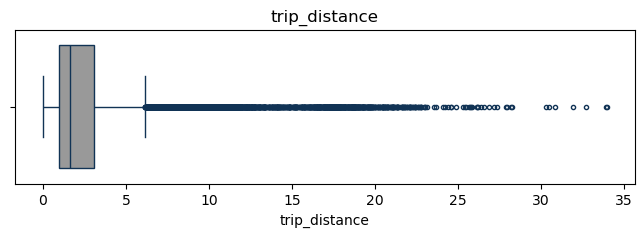

In [311]:
# to check for outliers
# box plot of trip_distance
plt.figure(figsize=(8,2))
plt.title('trip_distance')
sns.boxplot(data=df, x='trip_distance', color='.6', linecolor='#135', fliersize=3);

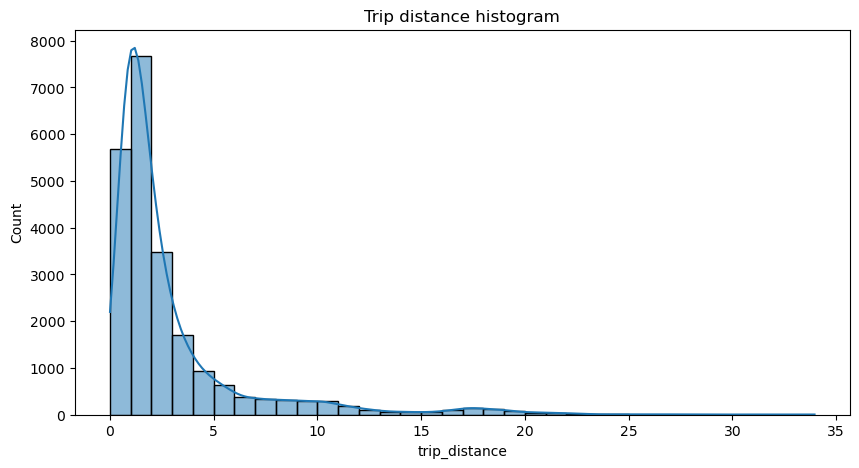

In [312]:
# histogram of trip_distance
plt.figure(figsize=(10,5))
plt.title('Trip distance histogram')
sns.histplot(df['trip_distance'], bins=range(0,26,1), kde=True);

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

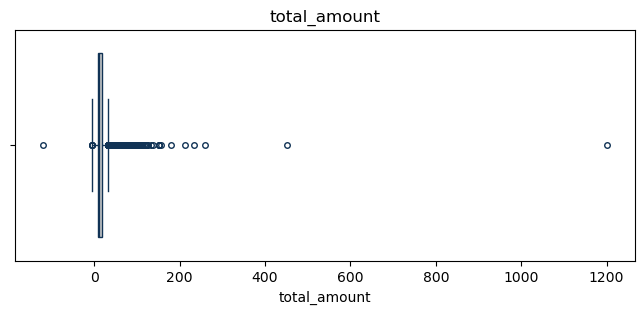

In [313]:
# box plot of total_amount
plt.figure(figsize=(8,3))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], color='.8', linecolor='#135', fliersize=4);

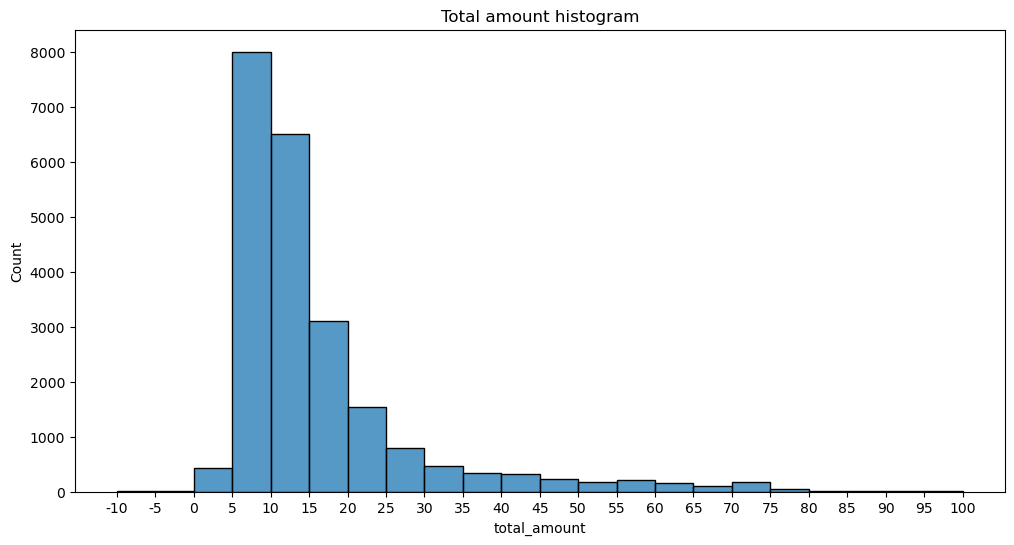

In [314]:
# histogram of total_amount
plt.figure(figsize=(12,6))
plt.title('Total amount histogram')
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5));

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

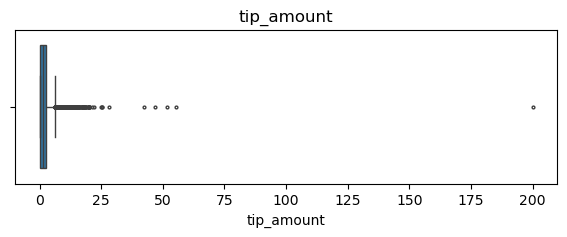

In [315]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=2);

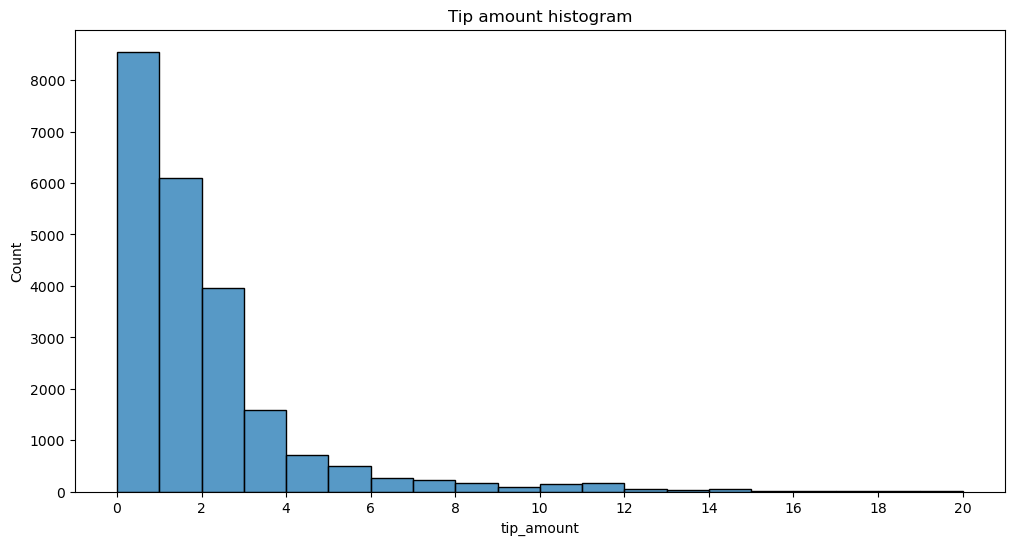

In [316]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

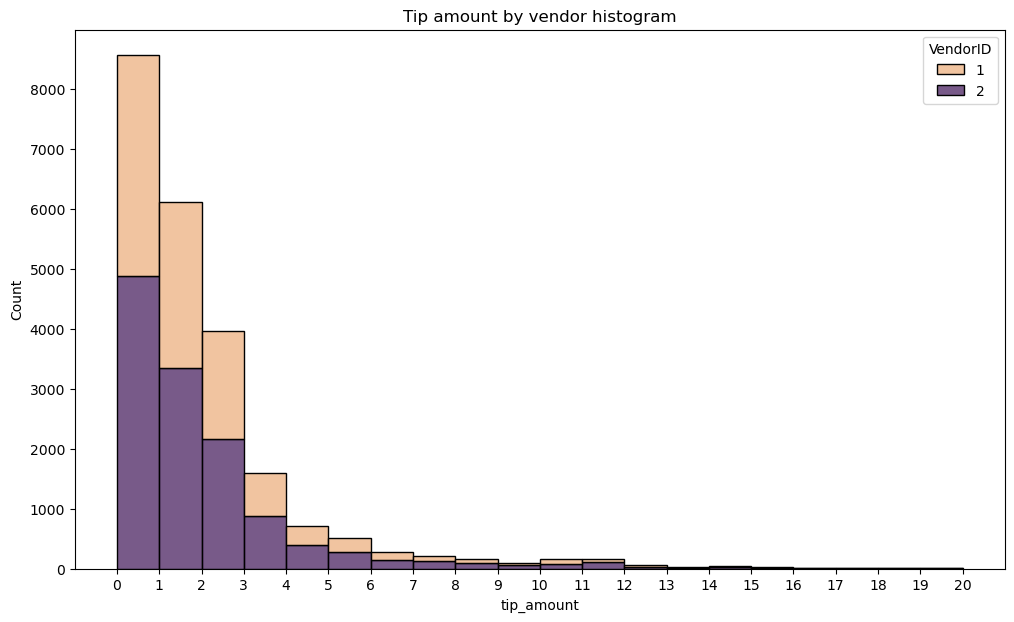

In [317]:
# histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='flare')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable difference in the distribution of tips between the two vendors in the dataset.

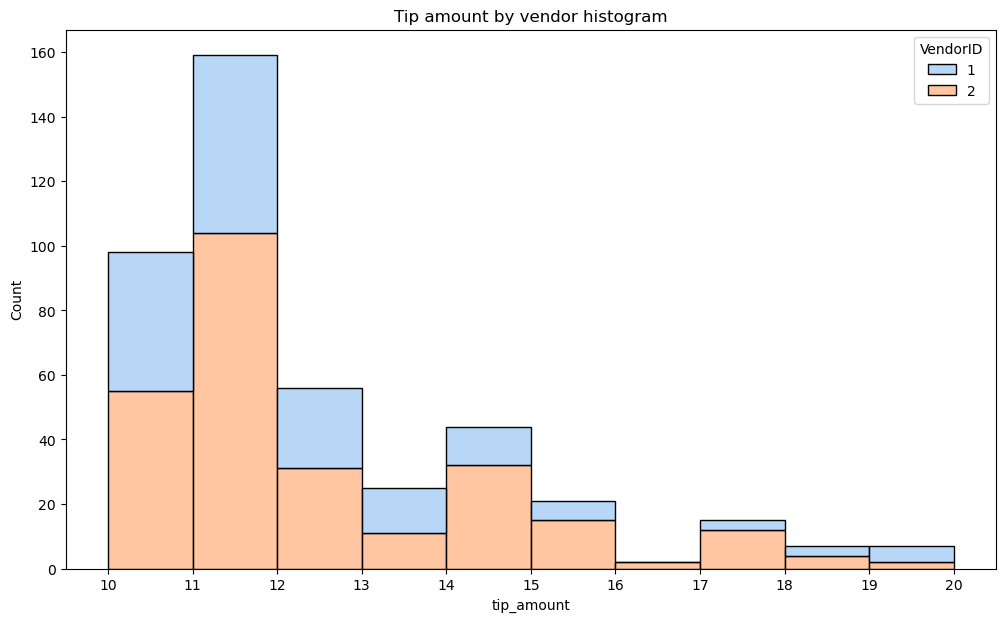

In [318]:
# histogram of tip_amount by vendor for tips > $10
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

In [319]:
# unique values in the `passenger_count` column
df[['passenger_count']].value_counts()

passenger_count
1                  16117
2                   3305
5                   1143
3                    953
6                    693
4                    455
0                     33
Name: count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [320]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


C:\Users\hiral\AppData\Local\Temp\ipykernel_21156\1414174596.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\hiral\AppData\Local\Temp\ipykernel_21156\1414174596.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


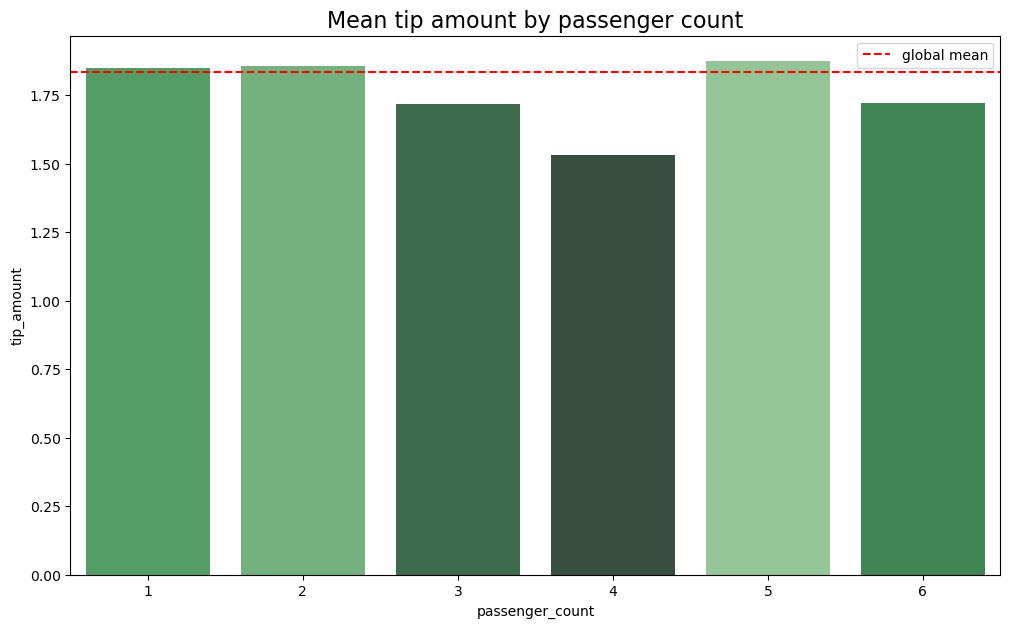

In [321]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

In [322]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [323]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [324]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [325]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

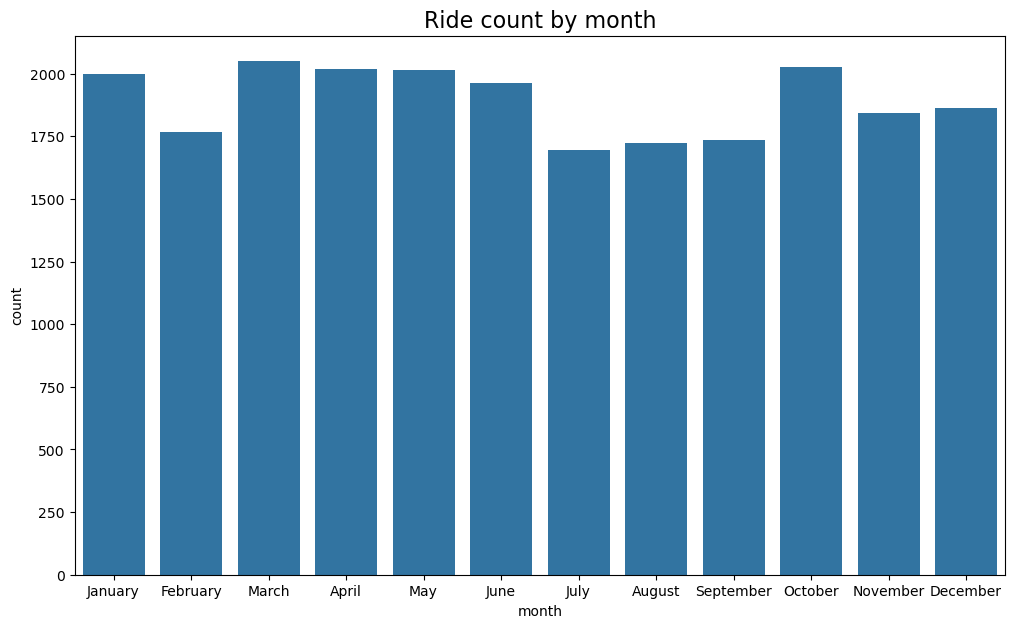

In [326]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticks(month_order)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Monthly rides are fairly consistent, with notable dips in the months of July, August, September, and in February.

In [327]:
# Repeat the above process, this time for rides by day of the week
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

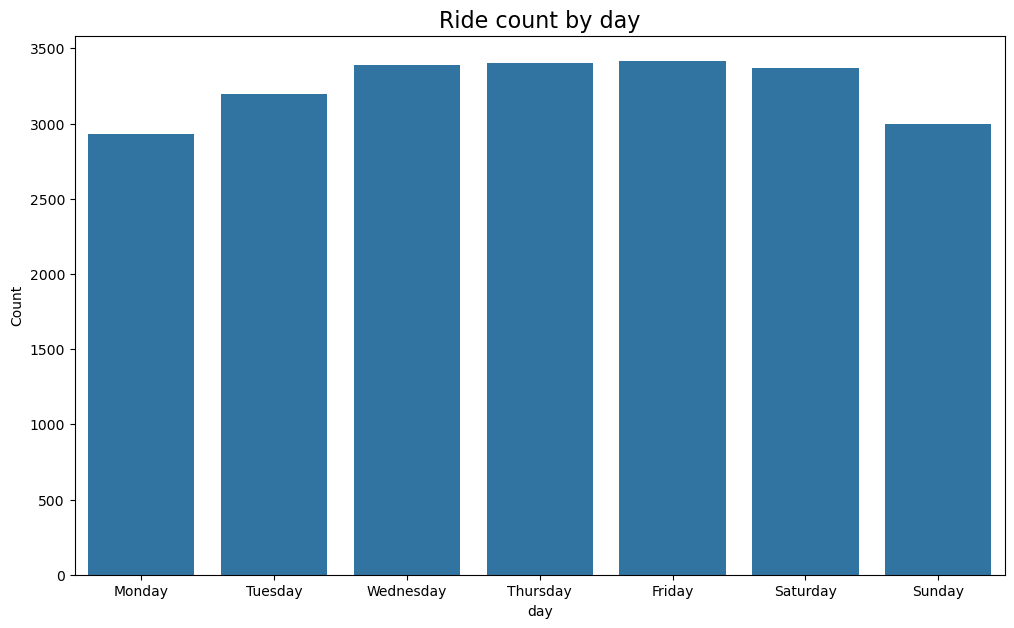

In [328]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticks(day_order)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

In [329]:
# Repeat the process, this time for total revenue by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


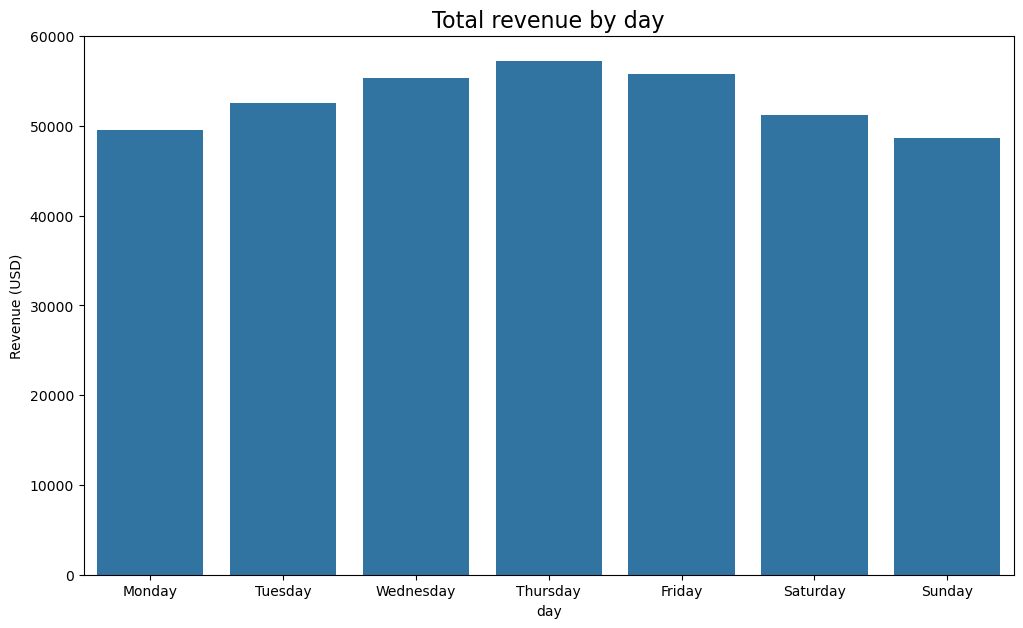

In [330]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticks(day_order)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

In [331]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


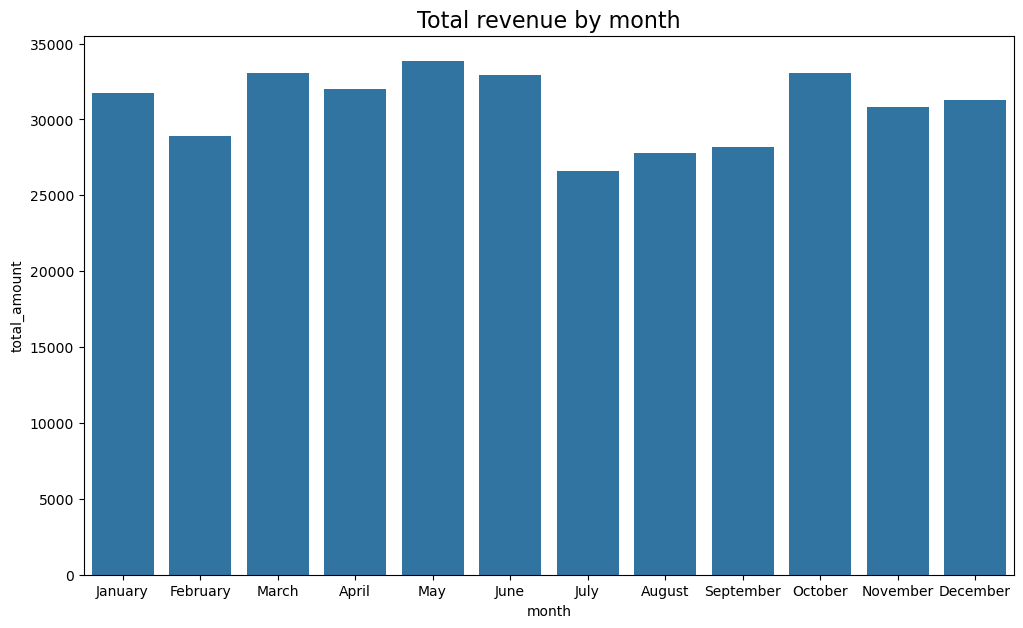

In [332]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

In [333]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [334]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in ascending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


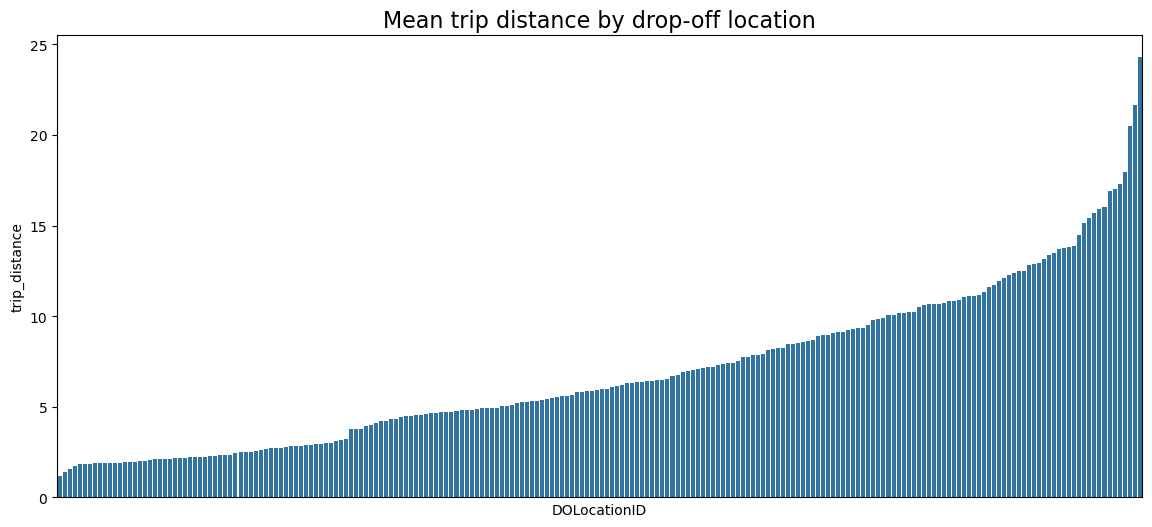

In [335]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

In [336]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

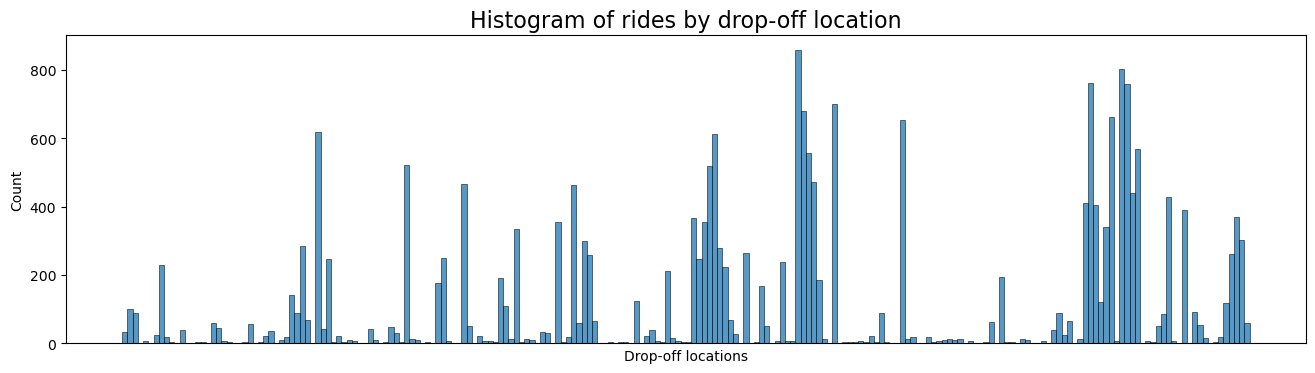

In [337]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

In [358]:
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

In [359]:
df.head(10)

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.716667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,8.000000
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,21.983333
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,12.116667
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,20.433333


### **Statistical analysis**

In [360]:
from scipy import stats

In [361]:
# descriptive stats code for EDA
df.describe(include='all')

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,...,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699,22699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413,NaN
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,...,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,...,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,...,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,...,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,NaN,NaN,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,...,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,NaN,NaN,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,...,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,NaN,NaN,1439.550000


In [362]:
# average fare amount for each payment type.
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.

### **Hypothesis testing**
**Null hypothesis** ($H_0$): There is no difference in average fare between customers who use credit cards and customers who use cash. <br> 
**Alternative hypothesis** ($H_A$): There is a difference in average fare between customers who use credit cards and customers who use cash.

choosing 5% as the significance level and proceed with a two-sample t-test.

In [363]:
#hypothesis test, A/B test
#significance level

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is significantly smaller than the significance level of 5%, we can reject the null hypothesis. <br>Therefore, there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.


## **Regression Analysis**

In [364]:
# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [365]:
# Keep `df` as the original dataframe and create a copy (df0) where changes will go
# Can revert `df0` to `df` if needed down the line
df0 = df.copy()

# Display the dataset's shape
print(df0.shape)

# Display basic info about the dataset
df0.info()

(22699, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip ID                22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64  

In [366]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print('Shape of dataframe:', df0.shape)
print('Shape of dataframe with duplicates dropped:', df0.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df0.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df0.isna().sum()

Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)
Total count of missing values: 0
Missing values per column:


Trip ID                  0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
month                    0
day                      0
duration                 0
dtype: int64

In [367]:
df0.describe()

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like tip_amount ($200) and total_amount (1,200). Also, a number of the variables, such as mta_tax, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

In [368]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip ID                22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

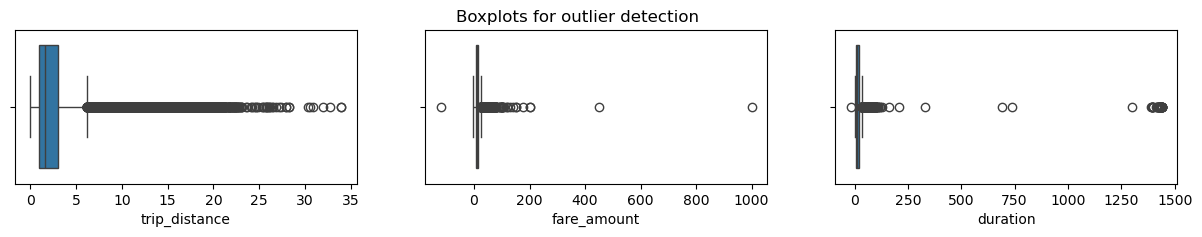

In [369]:
# plotting box plot for feature: trip_distance, fare_amount, duration
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df0['trip_distance'])
sns.boxplot(ax=axes[1], x=df0['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

All three variables contain outliers. Some are extreme, but others not so much.
 The values for fare_amount and duration definitely seem to have problematic outliers on the higher end.

In [370]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [371]:
# Calculate the count of rides where trip_distance is zero.
sum(df0['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

**fare_amount outliers**

In [372]:
# outliers in fare_amount column
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

Impute values less than $0 with `0`.

In [373]:
# Impute values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [374]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [375]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



**duration outliers**

In [376]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [377]:
# Impute a 0 for any negative values
df0.loc[df0['duration'] < 0, 'duration'] = 0
df0['duration'].min()

0.0

In [378]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



## **Feature engineering**

In [379]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [380]:
# groupby() statement to group each row by the new pickup_dropoff column, compute the mean, and capture the values only in the trip_distance column.
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [381]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [382]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0[(df0['PULocationID']==100) & (df0['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [383]:
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

# Confirm that it worked
df0[(df0['PULocationID']==100) & (df0['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [384]:
# Create two new columns, day (name of day) and month (name of month) by extracting the relevant information from the tpep_pickup_datetime column
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [385]:
# Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not
# Create 'rush_hour' col
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0.loc[df0['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [386]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [387]:
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

C:\Users\hiral\AppData\Local\Temp\ipykernel_21156\788774532.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)


,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,apr,saturday,16.716667,4 112,4.435000,14.616667,0


**Creating a scatter plot to visualize the relationship between mean_duration and fare_amount.**

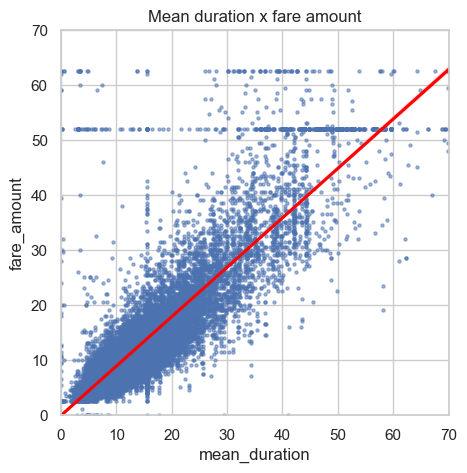

In [388]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df0['mean_duration'], y=df0['fare_amount'], scatter_kws={'alpha':0.5, 's':5}, line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [389]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

There are 514 trips whose fares were $52.

In [390]:
# Examine the first 30 of these trips.
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df0[df0['fare_amount']==52].head(30)

,Trip ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,71.583333,132 148,17.994286,46.340476,0


It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

**Drop features that are redundant.**

In [391]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip ID                22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [393]:
df1 = df0.copy()

df1 = df1.drop(['Trip ID', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


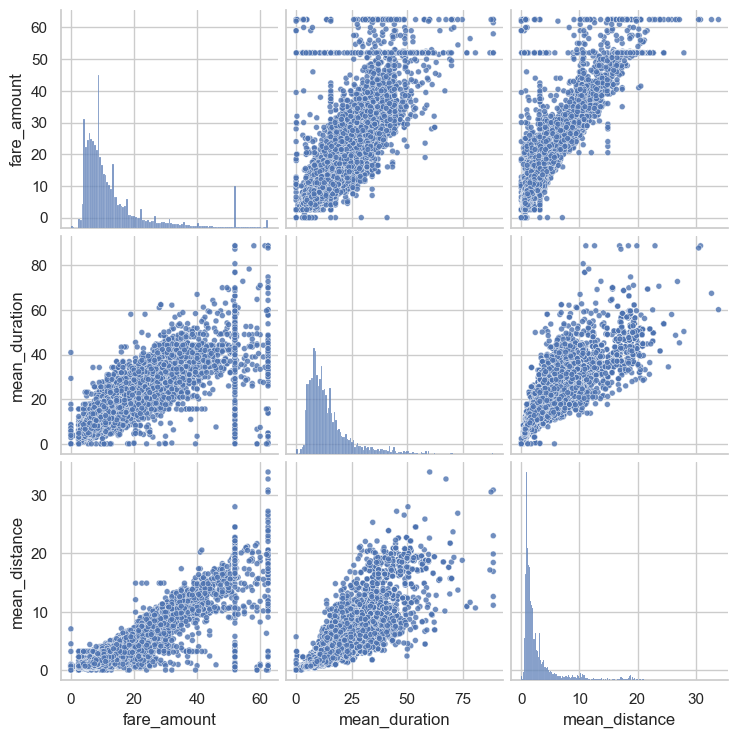

In [394]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.8, 'size':5},
             );

In [395]:
# Create correlation matrix containing pairwise correlation of columns, using `pearson correlation coefficient`
df1.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


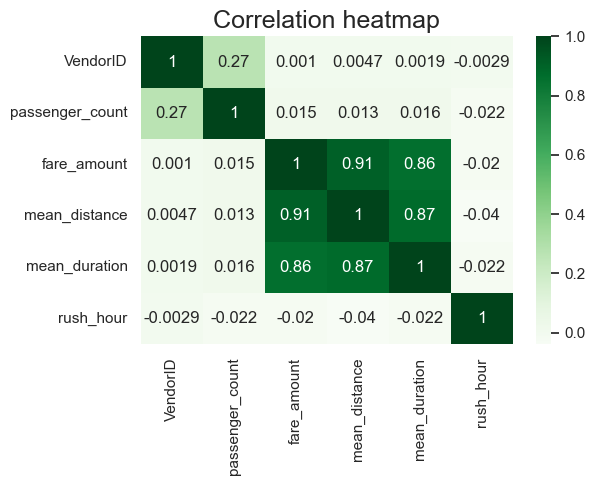

In [396]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='Greens')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

This model will predict `fare_amount`, which will be used as a target variable in machine learning models. Therefore, we are modeling with both variables even though they are correlated.

**Splitting data into outcome variable and features**

In [397]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [398]:
# X represents the features and y represents the outcome (target) variable
# Remove the target column from the features
X = df1.drop(columns=['fare_amount'])

# Set y variable
y = df1[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


**Dummy encode categorical variables**

In [399]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [400]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [401]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [402]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

**Evaluating model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [403]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


Calculate the same metrics on the test data

In [404]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [405]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593877
MSE: 14.326454156998947
RMSE: 3.7850302716093234


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

## **Visualize model results**

In [406]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


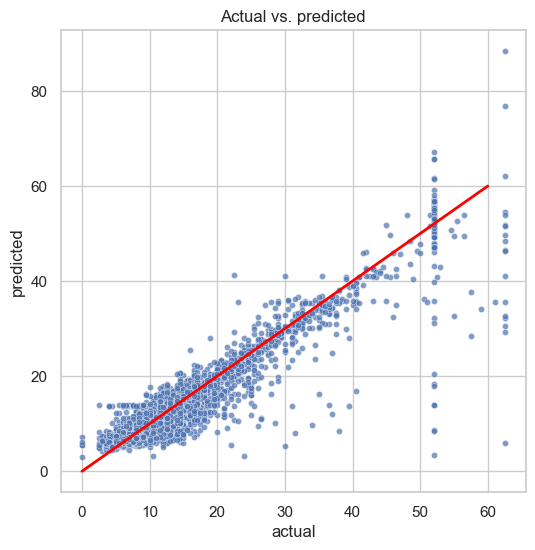

In [407]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.7,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

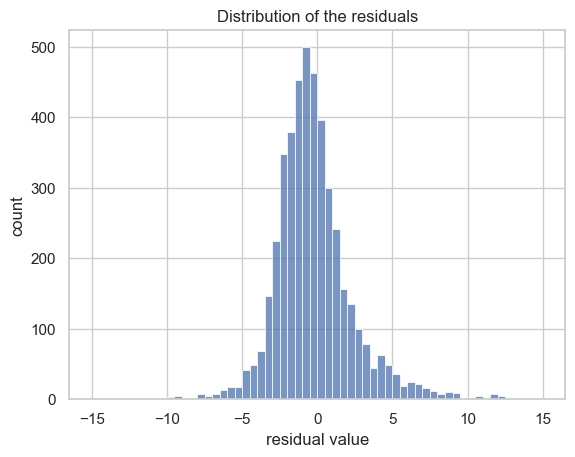

In [408]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [409]:
results['residual'].mean()

-0.015442621528680768

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

**It demonstrates that the model's errors are evenly distributed and unbiased.**

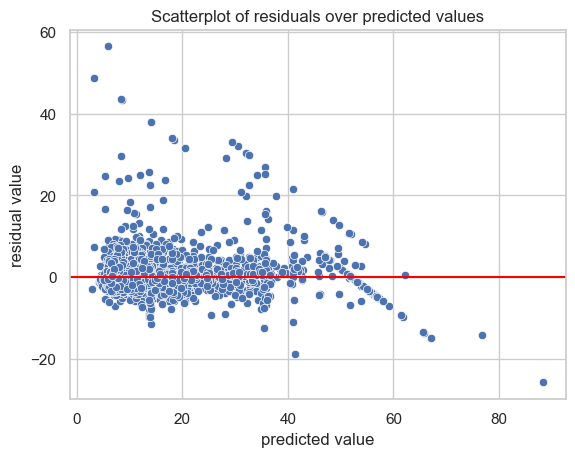

In [410]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

In [411]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


In [412]:
#unscale the data
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Interpretation: for every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.

In [413]:
# Predict on full dataset
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [414]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [415]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269976
MSE: 12.101575504689938
RMSE: 3.4787318816905017


In [417]:
# Combine means columns with predictions column
nyc_preds_means = df1[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
